# Day 5: Visualization

In [ ]:
from pathlib import Path

import pandas as pd

In [72]:
path = Path('data/movielens/')

# reading
movies = pd.read_csv(path / 'movies.csv', index_col='movieId')
links = pd.read_csv(path / 'links.csv', index_col='movieId')
movies = movies.merge(links, how='inner', left_index=True, right_index=True)

# extracting year
pattern = r'\((?P<year>\d+)\)\s?$'
movies['year'] = movies['title'].str.extract(pattern)

# casting
movies['title'] = movies['title'].astype('string')
movies['genres'] = movies['genres'].astype('string')
movies['imdbId'] = movies['imdbId'].astype('int32')
movies['tmdbId'] = movies['tmdbId'].astype('Int32')
movies['year'] = movies['year'].astype('Int32')
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9742 entries, 1 to 193609
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   9742 non-null   string
 1   genres  9742 non-null   string
 2   imdbId  9742 non-null   int32 
 3   tmdbId  9734 non-null   Int32 
 4   year    9729 non-null   Int32 
dtypes: Int32(2), int32(1), string(2)
memory usage: 619.6 KB


## Descriptive Statistic

In [ ]:
movies.describe()

## Time Series

In [ ]:
from pathlib import Path

ratings = pd.read_csv('data/movielens/ratings.csv')
ratings.info() # 2022-04-28

In [ ]:
ratings['parsed_time'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings.info()

### Filters

In [ ]:
ratings['parsed_time'] > '2015-01-01'
ratings['parsed_time'].dt.year == 2017


In [ ]:
# triedenie podla vyparsovaneho datumu a casu
ratings.sort_values(by='parsed_time', ascending=True)

### Task/Lab

1. Zistite, aké bolo priemerné hodnotenie filmu *Titanic* od *James-a Cameroon-a* o rok neskôr po ovedení tohto filmu do kín.

In [ ]:
# titanic od Camerona
is_titanic = movies['title'].str.startswith('Titanic') & (movies['year'] == 1997)

df = movies.loc[ is_titanic ].merge(ratings, how='inner', on='movieId')
df.loc[ df['parsed_time'].dt.year == 1998, 'rating' ].mean()
#.sort_values(by='parsed_time', ascending=True)

In [ ]:
# filter
cameroons_titanic = movies['title'].str.startswith('Titanic') & (movies['year'] == 1997)

# query
titanic_ratings = movies.loc[ cameroons_titanic ].merge(ratings, how='inner', on='movieId')  # .sort_values(by='parsed_time', ascending=True)
titanic_ratings.loc[ titanic_ratings['parsed_time'].dt.year == 1998, 'rating' ].mean()

## Visualization

In [73]:
#creating a DataFrame
import numpy as np
df = pd.DataFrame(np.random.rand(10, 4), 
                  columns=('col_1', 'col_2', 'col_3', 'col_4'))
df

,col_1,col_2,col_3,col_4
0,0.292473,0.635288,0.243184,0.623686
1,0.967723,0.855671,0.952017,0.437658
2,0.597651,0.202224,0.859949,0.311420
3,0.870297,0.240621,0.998018,0.586276
4,0.713202,0.830292,0.657666,0.000198
5,0.871887,0.908788,0.856466,0.802652
6,0.076484,0.263376,0.090891,0.310714
7,0.596126,0.060626,0.011953,0.148333
8,0.341701,0.546308,0.909755,0.183646
9,0.517992,0.230732,0.199547,0.706833


### Line Graph

<AxesSubplot:>

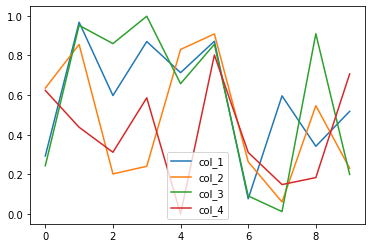

In [74]:
df.plot()

<AxesSubplot:xlabel='col_1'>

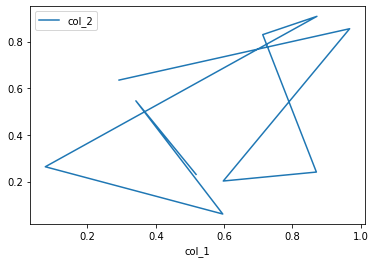

In [75]:
df.plot(x='col_1', y='col_2')

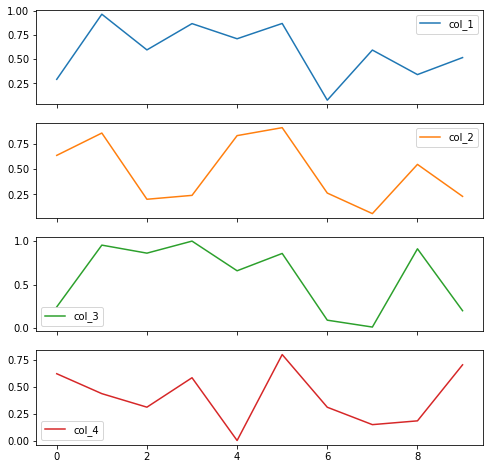

In [76]:
df.plot(subplots=True, figsize=(8, 8));

### Bar Graph

In [ ]:
df.plot(kind="bar")

In [ ]:
df.plot.bar(stacked=True);

In [ ]:
df.plot.barh(stacked=True);

### Box Plot

In [ ]:
df.plot.box()

### Area Plot

In [ ]:
df.plot.area()

## Indiana Jones

|            | Indy 1 | Indy 2 | Indy 3 | Indy 4 |
|------------|--------|--------|--------|--------|
| 2000-01-01 |   5    |   4    |   3    |   1    |
| 2000-01-02 |   4    |   3    |   2    |   2    |

In [104]:
# filters for indiana jones movies
indy1 = movies['title'].str.startswith('Raiders of the Lost Ark') & (movies['year'] == 1981)
indy2 = movies['title'].str.startswith('Indiana Jones and the Temple')
indy3 = movies['title'].str.startswith('Indiana Jones and the Last Crusade')
indy4 = movies['title'].str.startswith('Indiana Jones and the Kingdom')

# append dates only
ratings['date'] = ratings['parsed_time'].dt.date

# all movies
movies.loc[ indy1 | indy2 | indy3 | indy4 ] \
    .merge(ratings, how='inner', on='movieId') \
    .groupby(['date', 'movieId'])['rating'] \
    .mean()

# indy 1
indy1_ratings = movies.loc[ indy1 ] \
    .merge(ratings, how='inner', on='movieId') \
    .groupby('date')['rating'] \
    .mean() \
    .reset_index() \
    .rename(columns={'rating': 'indy1'})

In [105]:
# indy 2
indy2_ratings = movies.loc[ indy2 ] \
    .merge(ratings, how='inner', on='movieId') \
    .groupby('date')['rating'] \
    .mean() \
    .reset_index() \
    .rename(columns={'rating': 'indy2'})

In [120]:
# indy 3
indy3_ratings = movies.loc[ indy3 ] \
    .merge(ratings, how='inner', on='movieId') \
    .groupby('date')['rating'] \
    .mean() \
    .reset_index() \
    .rename(columns={'rating': 'indy3'})

In [123]:
# indy 4
indy4_ratings = movies.loc[ indy4 ] \
    .merge(ratings, how='inner', on='movieId') \
    .groupby('date')['rating'] \
    .mean() \
    .reset_index() \
    .rename(columns={'rating': 'indy4'})

In [125]:
# merge them together
# indy1_ratings.sort_values('date')
# indy2_ratings.sort_values('date')

indy_ratings = indy1_ratings \
    .merge(indy2_ratings, how='outer', on='date') \
    .merge(indy3_ratings, how='outer', on='date') \
    .merge(indy4_ratings, how='outer', on='date')

In [131]:
indy_ratings.sort_values('date', ascending=True)
# indy_ratings.plot(x='date')


,date,indy1,indy2,indy3,indy4
0,1996-12-13,4.0,NaN,NaN,NaN
1,1996-12-26,5.0,NaN,5.0,NaN
2,1997-01-28,5.0,NaN,NaN,NaN
3,1997-02-23,5.0,NaN,NaN,NaN
4,1997-03-19,4.0,NaN,3.0,NaN
...,...,...,...,...,...
193,2018-08-18,4.0,4.0,4.0,NaN
194,2018-08-24,5.0,NaN,NaN,NaN
195,2018-08-28,5.0,NaN,NaN,NaN
196,2018-08-30,3.5,NaN,NaN,NaN


In [156]:
# pridanie date stlpca
ratings['date'] = ratings['parsed_time'].dt.date

In [157]:
# filters
is_indy = movies['title'].str.contains('Indiana Jones')
is_indy1 = movies['title'].str.startswith('Raiders of the Lost Ark') & (movies['year'] == 1981)
is_indy2 = movies['title'].str.startswith('Indiana Jones and the Temple of Doom')
is_indy3 = movies['title'].str.startswith('Indiana Jones and the Last Crusade')
is_indy4 = movies['title'].str.startswith('Indiana Jones and the Kingdom of the Crystal Skull')

In [168]:
# processing indy 1
rating_indy1 = movies.loc[ is_indy1 ] \
    .merge(ratings, how='inner', on='movieId') \
    .loc[:, ['date', 'rating' ]] \
    .groupby('date') \
    .mean() \
    .rename(columns={'rating': 'indy1'})

In [169]:
# processing indy 2
rating_indy2 = movies.loc[ is_indy2 ] \
    .merge(ratings, how='inner', on='movieId') \
    .loc[:, ['date', 'rating' ]] \
    .groupby('date') \
    .mean() \
    .rename(columns={'rating': 'indy2'})

In [170]:
# processing indy 3
rating_indy3 = movies.loc[ is_indy3 ] \
    .merge(ratings, how='inner', on='movieId') \
    .loc[:, ['date', 'rating' ]] \
    .groupby('date') \
    .mean() \
    .rename(columns={'rating': 'indy3'})

In [171]:
# processing indy 4
rating_indy4 = movies.loc[ is_indy4 ] \
    .merge(ratings, how='inner', on='movieId') \
    .loc[:, ['date', 'rating' ]] \
    .groupby('date') \
    .mean() \
    .rename(columns={'rating': 'indy4'})

In [179]:
ratings_indy = rating_indy1 \
    .merge(rating_indy2, how='outer', on='date') \
    .merge(rating_indy3, how='outer', on='date') \
    .merge(rating_indy4, how='outer', on='date')

In [181]:
ratings_indy.sort_values('date', ascending=True)

,indy1,indy2,indy3,indy4
date,,,,
1996-12-13,4.0,NaN,NaN,NaN
1996-12-26,5.0,NaN,5.0,NaN
1997-01-28,5.0,NaN,NaN,NaN
1997-02-23,5.0,NaN,NaN,NaN
1997-03-19,4.0,NaN,3.0,NaN
...,...,...,...,...
2018-08-18,4.0,4.0,4.0,NaN
2018-08-24,5.0,NaN,NaN,NaN
2018-08-28,5.0,NaN,NaN,NaN


In [182]:
ratings_indy.describe()

,indy1,indy2,indy3,indy4
count,197.000000,108.000000,140.000000,38.000000
mean,4.206853,3.638889,4.046429,2.828947
std,0.798223,0.850600,0.781753,1.060828
min,0.500000,1.000000,0.500000,0.500000
25%,4.000000,3.000000,3.875000,2.000000
50%,4.000000,4.000000,4.000000,3.000000
75%,5.000000,4.000000,4.500000,3.500000
max,5.000000,5.000000,5.000000,5.000000


,indy4
count,38.000000
mean,2.828947
std,1.060828
min,0.500000
25%,2.000000
50%,3.000000
75%,3.500000
max,5.000000
